In [1]:
from fastai.vision.all import *
import os
import sys

sys.path.insert(0, '../..')
from lib.GraphLib import DrawGraphFromString

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [4]:
im3 = Image.open(threes[1])

In [5]:
im3

In [6]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254,
        255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
tensor(im3)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255,
         254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  4

In [8]:
im3_df = pd.DataFrame(tensor(im3))
im3_df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [9]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

In [10]:
three_tensors[1].shape

torch.Size([28, 28])

<Axes: >

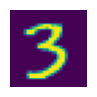

In [11]:
show_image(three_tensors[1])

In [12]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

## Attempt 1: L1 Norm of Pixels

<Axes: >

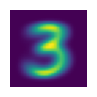

In [13]:
ideal3 = stacked_threes.mean(0)
show_image(ideal3)

<Axes: >

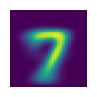

In [14]:
ideal7 = stacked_sevens.mean(0)
show_image(ideal7)

In [15]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

In [16]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [17]:
valid_3_dist = mnist_distance(valid_3_tens, ideal3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]))

In [18]:
def is_3_l1(x): return mnist_distance(x, ideal3) < mnist_distance(x, ideal7)

In [19]:
test_3_1 = is_3_l1(valid_3_tens)
test_3_1.sum() / len(test_3_1)

tensor(0.9168)

In [20]:
accuracy_3_l1 = is_3_l1(valid_3_tens).float().mean()
accuracy_7_l1 = (1 - is_3_l1(valid_7_tens).float()).mean()
accuracy_3_l1,accuracy_7_l1,(accuracy_3_l1+accuracy_7_l1)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## Stochastic Gradient Descent with PyTorch

6. Repeat Process


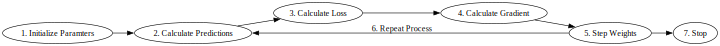

In [52]:
DrawGraphFromString('''
1. Initialize Paramters->2. Calculate Predictions->3. Calculate Loss->4. Calculate Gradient->5. Step Weights->7. Stop
5. Step Weights->2. Calculate Predictions[label=6. Repeat Process]
''', size='10,20')

Let's start with a simple, synthetic, example model. Imagine you were measuring the speed of a roller coaster as it went over the top of a hump. It would start fast, and then get slower as it went up the hill; it would be slowest at the top, and it would then speed up again as it went downhill. You want to build a model of how the speed changes over time. If you were measuring the speed manually every second for 20 seconds, it might look something like this:

In [26]:
time = torch.arange(0,20).float()
time


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

In [27]:
# Add some random noise
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

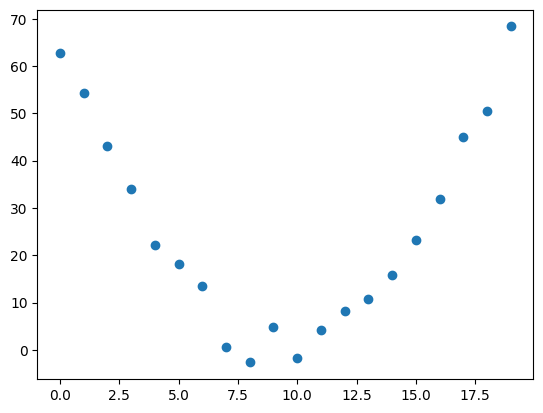

In [28]:
plt.scatter(time,speed)

In [29]:
# Function to compute the speed at a given time t with coefficients a,b,c
def speed_f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [30]:
# MSE loss
def mse(preds, targets): return ((preds-targets)**2).mean()

### 7 Step Process for Finding the Best Paramters using Stochastic Gradient Descent

In [31]:
# 1. Initialize parameters
params = torch.randn(3).requires_grad_()
# Requires grad tells PyTorch to track the gradients of this tensor

In [32]:
# 2. Calculate predictions
preds = speed_f(time, params)

In [33]:
# Quick functions to show how close our predictions are to the actuals
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

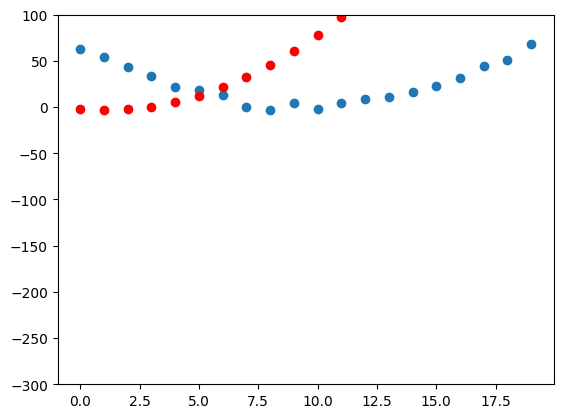

In [34]:
show_preds(preds)

In [36]:
# 3: Calculate the loss
loss = mse(preds, speed)
loss

tensor(16337.1816, grad_fn=<MeanBackward0>)

In [37]:
# 4: Calculate the gradients
loss.backward()
params.grad

tensor([41973.6367,  2652.3347,   157.6320])

In [38]:
# 5: Step the weights
# Multiply the gradients by a small number and subtract from our weights to minimize the loss
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [39]:
# Lets see if loss has improved
preds = speed_f(time, params)
mse(preds, speed)

tensor(3645.6465, grad_fn=<MeanBackward0>)

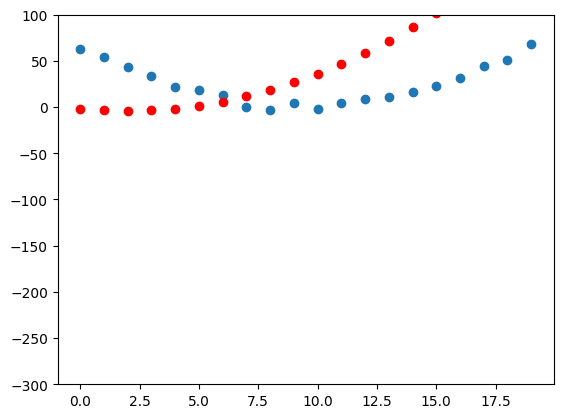

In [40]:
show_preds(preds)

In [43]:
# Encapsulate all of steps 2-5 in a function
def apply_step(params, prn=True):
    preds = speed_f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(f'Loss: {loss.item()}')
    return preds

In [42]:
# 6: Repeat the process
for i in range(10): apply_step(params)

3645.646484375
1244.0010986328125
789.5167236328125
703.4947509765625
687.1972045898438
684.0936279296875
683.4866333007812
683.3521728515625
683.30712890625
683.2791137695312


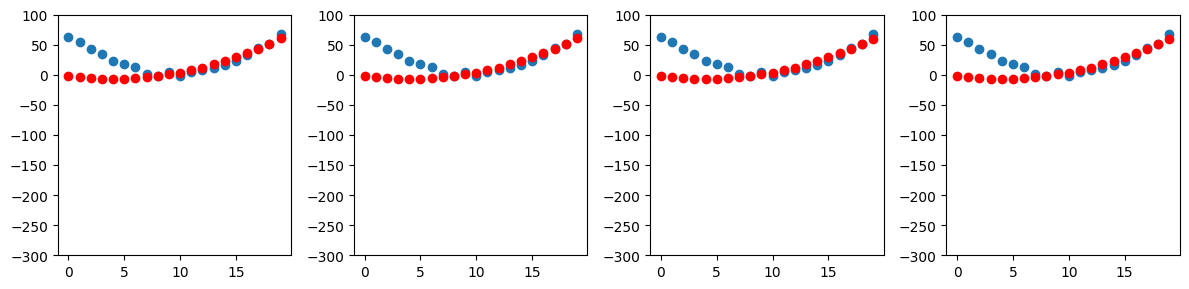

In [46]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

## Attempt 2:

In [53]:
# Convert our separate stacked tensors into a single tensor
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [54]:
# Create a tensor of labels for each image - 1 for 3s, 0 for 7s
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [55]:
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [56]:
# We need to create a PyTorch Dataset object by combining our feature (image) and label (y) tensors
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [57]:
# Lets repeat the process for our validation set
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [58]:
# Step 1: Initialize the parameters
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [59]:
weights = init_params((28*28,1))

In [60]:
# We also need to add a bias to our weights to that our model can learn a y-intercept. 
# If we don't add a bias, our model will only be able to model lines that pass through the origin.
bias = init_params(1)

In [61]:
# Step 2: Calculate Predictions
(train_x[0]*weights.T).sum() + bias

tensor([-11.6046], grad_fn=<AddBackward0>)

#### Matrix Multiplication

In [62]:
# In python, the '@' symbol is used to represent matrix multiplication
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[-11.6046],
        [ -1.2974],
        [ -6.4261],
        ...,
        [ -8.2866],
        [-13.4446],
        [ -5.5549]], grad_fn=<AddBackward0>)

In [64]:
# Step 3: Calculate Loss
# Create a function that calculates the mean squared error of our predictions on the scale of 0 to 1

# Create a function that scales our predictions to be between 0 and 1
# def sigmoid(x): return 1/(1+torch.exp(-x))

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()